$\mathbf{Ikeda}$ map.
$ \qquad\qquad x_{n+1} = A + B(x_n \cos |En|^2 − y_n \sin |En|^2) \\
 \qquad\qquad y_{n+1} = B(x_n \sin |En|^2 + y_n \cos |En|^2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,8)

In [2]:
def Ikeda(A,B,n):
    
    def map_2d(X):
        x, y = X
        xn = A + B*x*np.cos(x**2 + y**2) - B*y*np.sin(x**2 + y**2)
        yn = B*x*np.sin(x**2 + y**2) + B*y*np.cos(x**2 + y**2)
        return (xn, yn)

    X0 = [A, 0]
    X, Y = [], []
    for i in range(n):
        xn, yn = map_2d(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(X, Y, color='blue', s=0.1)
    plt.xlabel('$Re(E_n)$', fontsize=15)
    plt.ylabel('$Im(E_n)$', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.suptitle(r'$A$={},$B$={}'.format(A,B), fontsize=25)
    plt.show()

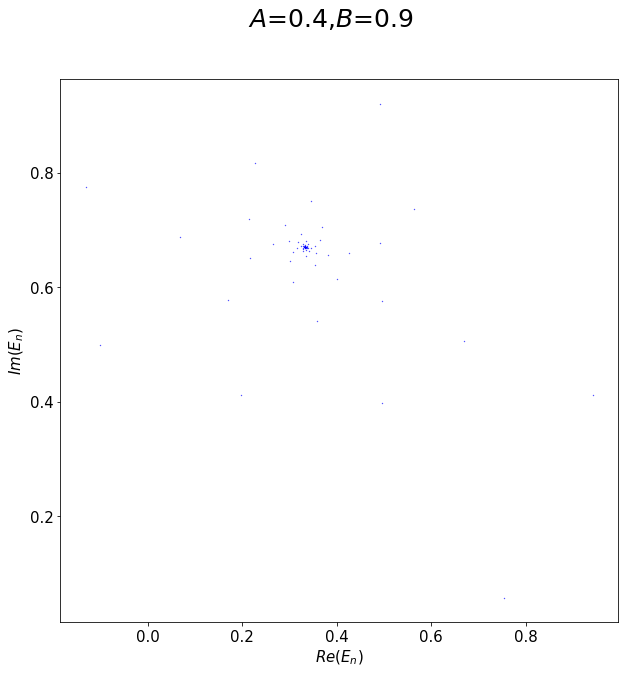

In [4]:
Ikeda(0.4,0.9,n = 50000)

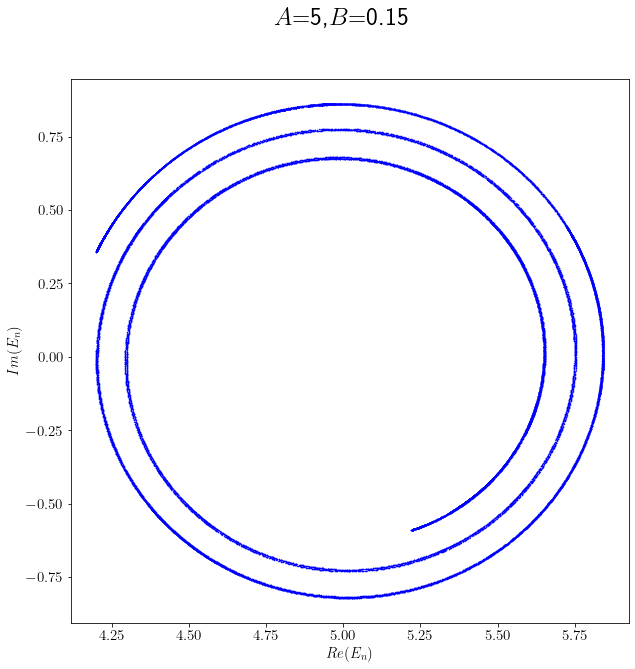

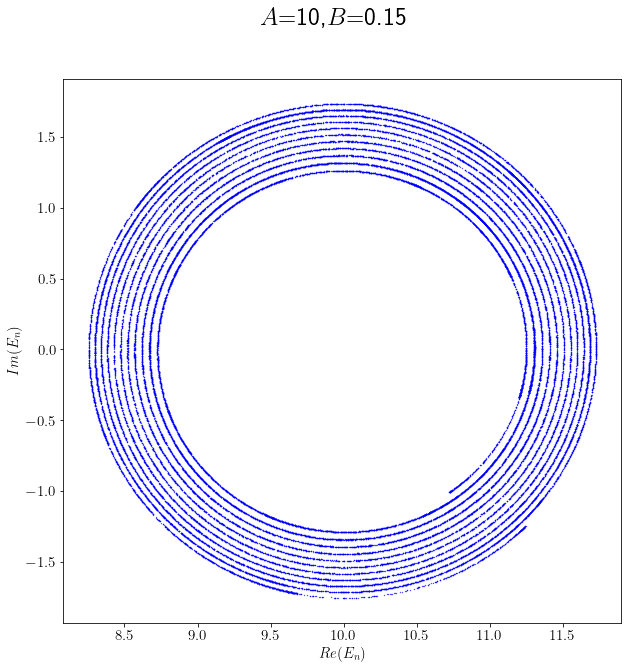

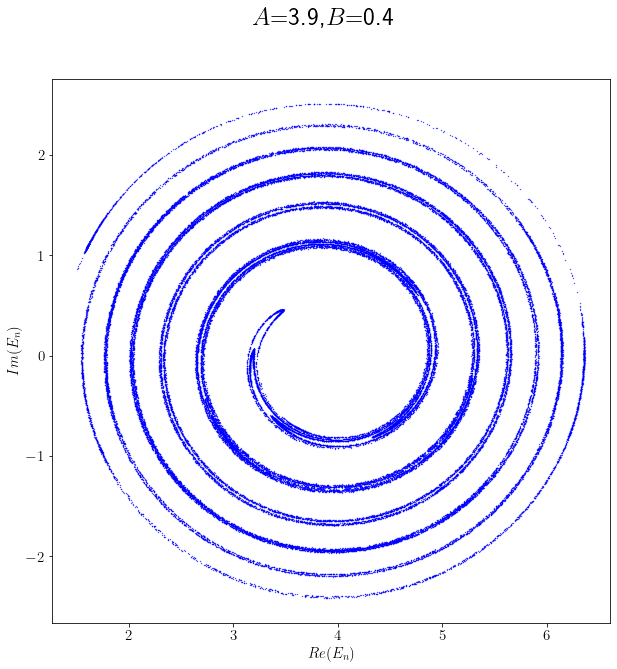

In [3]:
A =[ 5,10,3.9 ]
B =[0.15,0.15,0.4] 
n = 50000
for A,B in zip(A,B):
    Ikeda(A,B,n)

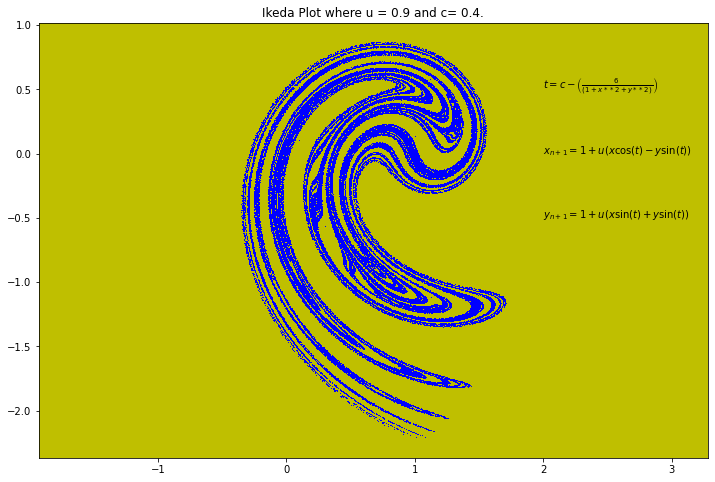

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
#numba gives a speedup of 3x for iterates 10^7...
#http://www.ams.org/samplings/feature-column/fcarc-henon
@nb.jit(nopython=True)
def IkedaMap(c,u, x,y):
    t = c-(6/(1+x**2+y**2))
    return 1+u*(x*np.cos(t)-y*np.sin(t)), u*(x*np.sin(t)+y*np.cos(t))

# Map dependent parameters
c =0.4
u = 0.9
iterates = 1e5

# Initial Condition
xtemp = 0.1
ytemp = 0.1

@nb.jit(nopython=True)
def make_points(xtemp=xtemp, ytemp=ytemp, iterates=iterates):
    x = [xtemp]
    y = [ytemp]
    for n in range(0,iterates):
        xtemp, ytemp = IkedaMap(c,u,xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
#        print('x:',xtemp,'y:',ytemp)
    return x,y
    
X,Y = make_points()

# Plot the time series
fig, ax = plt.subplots(figsize=(12,8))
ax.axis('equal')
# ax.set_axis_off()
ax.set_facecolor('y')
ax.set_title('Ikeda Plot where u = {0} and c= {1}.'.format(u,c))
ax.text(2,0.5,r'$t = c-\left(\frac{6}{(1+x**2+y**2)}\right)$')
ax.text(2,0,r'$x_{n + 1} = 1+u (x \cos(t) - y \sin(t))$')
ax.text(2,-0.5,r'$y_{n + 1} = 1+u (x \sin(t) + y \sin(t))$')
ax.plot(X,Y,'b,')
plt.show()